In [2]:
import os
import csv
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# A list of common english words which should not affect predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'you', 'your', 'yours', 'yourself']

In [5]:
X = [] # an element of X is represented as (filename, text)
Y = [] # an element of Y represents the category of the corresponding X element
#root_dir='text'
root_dir='email'
for category in os.listdir(root_dir):
    for document in os.listdir(root_dir+'/'+category):
        with open(root_dir+'/'+category+'/'+document, "r", encoding="latin-1") as f:
            X.append(f.read())

            Y.append(category)

print("there are %d messages/files\n %s " % (len(X),X[0:2]))
print("there are %d labels/files\n %s " % (len(Y),Y[0:1]))

there are 250 messages/files
 ['Due to explosive sales in our international business, we are in a position where we need to replenish our inventory. \n\nSpecifically we are looking for Agilent, Hewlett Packard and Tektronix equipment.(We also purchase over 40 other major electronic test equipment manufacturers)\n\nI have a large budget to purchase equipment for this purpose and would like to buy your surplus, excess, under-utilized, off lease, used or any other equipment available. \n\nPlease provide the manufacturer, model number, quantity, general condition and target price and I will respond with an offer right away. \n\nAsk about our trade-in, credit on account or other customized programs to maximize the value of your equipment. \n\n', "Warning alarm this incredible amazing opportunity possibility to make our profits.\nI have heard something great will occur on todays morning with another one.\n\nNice start for today.\nIt's going to be HOT one. \nBid rised already...\n\nEveryone b

In [6]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25)
len(X_train),len(Y_train),len(X_test),len(Y_test)

(187, 187, 63, 63)

In [7]:
print(X_train[1],Y_train[1])

The FAU men's and women's basketball teams will play host to Florida 
International University on Saturday, Feb. 10. The games will fan the 
rivalry between the schools, affect Sun Belt Conference standings and 
showcase the University on television (CSS - Comcast Sports Southeast). 
Come cheer the Owls and "Bury the Burrow in RED" by wearing red 
clothing. Let's break the attendance records for both teams. Tip-off is 
scheduled for 3:30 p.m. for the first game; the second game will start 
30 minutes after the conclusion of the first.

The night's events will include a live band. There will be free food, 
t-shirts and much more, including giveaways, such as a year's supply of 
Pepsi and movie passes - one lucky fan will even walk away with cash. 
In addition, the FAU National Alumni Association, FAU Program Board and 
SGA will host a pre-game party open to the public starting at 4:30 p.m.

As always, admission is free for students with an FAU ID, while general 
admission is $10. WEAR R

In [8]:
# Create vocabulary (using dictionary)
#topNum specify number of top words. If topNum=0, meaning selecting all words
def createVocabulary(inDataset, stopwordset,topNum):
    vocab = {}
    for i in range(len(inDataset)):
        word_list = []
        for word in inDataset[i].split():
            word_new  = word.strip(string.punctuation).lower()
            if (len(word_new)>2)  and (word_new not in stopwordset):  
                if word_new in vocab:
                    vocab[word_new]+=1
                else:
                    vocab[word_new]=1            
    # sort the dictionary to focus on most frequent words
    vocab_ordered=sorted(vocab.items(), key=lambda x: x[1],reverse=True)
    #import itertools
    if topNum==0:
        return(dict(vocab_ordered))
    elif topNum<len(vocab):
        V_cut=vocab_ordered[0:topNum]
        V_cut=dict(V_cut)
        return(V_cut)      
    return(dict(vocab_ordered))

In [9]:
#stopwords=[]
V=createVocabulary(X_train,stopwords,2000)

In [10]:
len(V)
V

{'2007': 76,
 'not': 57,
 'new': 50,
 'dear': 48,
 'data': 48,
 'information': 46,
 'email': 45,
 'research': 45,
 'university': 43,
 'security': 42,
 'students': 40,
 'like': 39,
 'conference': 39,
 'time': 39,
 'need': 36,
 'best': 34,
 'engineering': 34,
 'science': 33,
 'available': 31,
 'thank': 31,
 'computer': 31,
 'work': 31,
 'life': 30,
 'fau': 30,
 'windows': 30,
 'office': 29,
 'student': 28,
 'mining': 28,
 'software': 27,
 'help': 26,
 'free': 26,
 'number': 26,
 'low': 26,
 'committee': 26,
 'price': 25,
 'paper': 25,
 'united': 24,
 'thanks': 24,
 'contact': 24,
 'faculty': 24,
 'service': 23,
 'company': 23,
 'know': 23,
 'send': 23,
 'day': 23,
 'great': 23,
 'make': 22,
 'today': 22,
 'ieee': 22,
 'review': 22,
 'provide': 22,
 'degree': 22,
 'department': 22,
 'way': 21,
 'working': 21,
 'following': 21,
 'questions': 21,
 'florida': 20,
 'including': 20,
 'sent': 20,
 'use': 20,
 'good': 20,
 'features': 20,
 'based': 20,
 'experience': 20,
 'services': 19,
 'progr

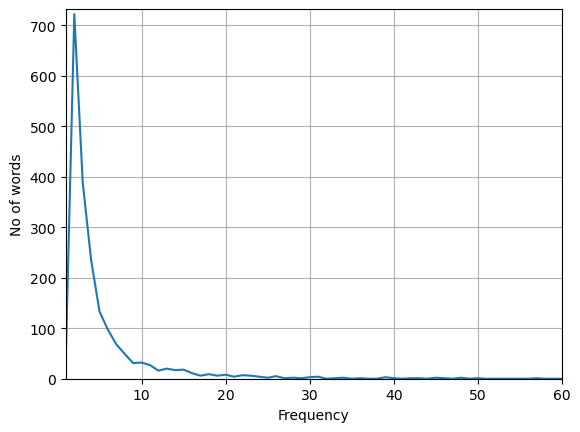

In [11]:
num_words = [0 for i in range(max(V.values())+1)] 
freq = [i for i in range(max(V.values())+1)] 
for key in V:
    num_words[V[key]]+=1
maxv=max(num_words)+10
plt.plot(freq,num_words)
plt.axis([1, 60, 0, maxv])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [12]:
# To represent training data as bog of words vector representaton (including counts)
def BoWInstances(inDataset,features):
    inDataset_ = np.zeros((len(inDataset),len(features)))
    # This can take some time to complete
    for i in range(len(inDataset)):
        # print(i) # Uncomment to see progress
        word_list = [ word.strip(string.punctuation).lower() for word in inDataset[i].split()]
        for word in word_list:
            if word in features:
                inDataset_[i][features.index(word)] += 1
    return(inDataset_)

In [13]:
# To represent test data as bag of word vector counts
features = list(V.keys())
X_train_dataset=BoWInstances(X_train,features)
X_test_dataset = BoWInstances(X_test,features)
len(X_train_dataset),len(X_test_dataset)

(187, 63)

In [14]:
# each document is now represented as a vector with sparse values
with np.printoptions(threshold=np.inf):
    print(X_train_dataset[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [15]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.9893048128342246
Sklearn's score on testing data : 0.9523809523809523
Classification report for testing data :-
              precision    recall  f1-score   support

      normal       0.91      1.00      0.95        29
        spam       1.00      0.91      0.95        34

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.96      0.95      0.95        63



In [16]:
# Implementing Multinomial Naive Bayes from scratch
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

In [17]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Our score on testing data : 0.9523809523809523
Classification report for testing data :-
              precision    recall  f1-score   support

      normal       0.91      1.00      0.95        29
        spam       1.00      0.91      0.95        34

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.96      0.95      0.95        63



In [18]:
# Get the class conditional probabilities for the top-10 most frequent words
def class_conditional_probabilities(clf, features, classes, top_n=10):
    class_probs = {}
    for class_ in classes:
        class_probs[class_] = {}
        class_prior = np.log(clf.class_count_[clf.classes_ == class_][0]) - np.log(clf.class_count_.sum())
        for word in features:
            word_index = features.index(word)
            word_prob = clf.feature_log_prob_[clf.classes_ == class_, word_index][0]
            class_probs[class_][word] = np.exp(class_prior + word_prob)
    
    # Find top-N words for each class
    top_words = {}
    for class_ in class_probs:
        top_words[class_] = sorted(class_probs[class_].items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return top_words

# Calculate and print class conditional probabilities of the top-10 most frequent words
top_words = class_conditional_probabilities(clf, features, clf.classes_, top_n=10)
for class_ in top_words:
    print(f"Top-10 words for class '{class_}':")
    for word, prob in top_words[class_]:
        print(f"Word: {word}, Probability: {prob}")
    print()


Top-10 words for class 'normal':
Word: 2007, Probability: 0.0038392295945946847
Word: data, Probability: 0.002943409355855926
Word: not, Probability: 0.0028154350360361036
Word: research, Probability: 0.00275144787612619
Word: dear, Probability: 0.002623473556306369
Word: conference, Probability: 0.0025594863963964557
Word: security, Probability: 0.002495499236486545
Word: students, Probability: 0.002431512076576634
Word: university, Probability: 0.0023675249166667215
Word: information, Probability: 0.0023035377567568113

Top-10 words for class 'spam':
Word: windows, Probability: 0.002419444892489793
Word: low, Probability: 0.002177500403240813
Word: life, Probability: 0.002016204077074827
Word: price, Probability: 0.001935555913991833
Word: company, Probability: 0.001935555913991833
Word: new, Probability: 0.0017742595878258477
Word: time, Probability: 0.0017742595878258477
Word: best, Probability: 0.0017742595878258477
Word: degree, Probability: 0.0017742595878258477
Word: features, 

In [19]:
# Calculate and print the top-10 words with the highest class conditional probabilities
top_words_all = class_conditional_probabilities(clf, features, clf.classes_, top_n=None)
for class_ in top_words_all:
    print(f"Top words with highest conditional probabilities for class '{class_}':")
    for word, prob in top_words_all[class_]:
        print(f"Word: {word}, Probability: {prob}")
    print()


Top words with highest conditional probabilities for class 'normal':
Word: 2007, Probability: 0.0038392295945946847
Word: data, Probability: 0.002943409355855926
Word: not, Probability: 0.0028154350360361036
Word: research, Probability: 0.00275144787612619
Word: dear, Probability: 0.002623473556306369
Word: conference, Probability: 0.0025594863963964557
Word: security, Probability: 0.002495499236486545
Word: students, Probability: 0.002431512076576634
Word: university, Probability: 0.0023675249166667215
Word: information, Probability: 0.0023035377567568113
Word: email, Probability: 0.0023035377567568113
Word: engineering, Probability: 0.002175563436936989
Word: fau, Probability: 0.001983601957207254
Word: new, Probability: 0.0019196147972973439
Word: science, Probability: 0.0019196147972973439
Word: like, Probability: 0.0017916404774775206
Word: computer, Probability: 0.0017916404774775206
Word: student, Probability: 0.0017916404774775206
Word: mining, Probability: 0.001791640477477520

In [20]:
# Implement k-fold cross-validation framework
k_fold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = model_selection.cross_val_score(clf, X_train_dataset, Y_train, cv=k_fold, scoring='accuracy')
print("5-fold Cross Validation Accuracy Scores:", cv_scores)


5-fold Cross Validation Accuracy Scores: [0.94736842 0.97368421 0.89189189 0.97297297 0.91891892]


In [24]:
import random
from sklearn.metrics import f1_score

def run_random_sampling(X, Y, x_percent):
    accuracies = []
    f1_scores = []
    
    for _ in range(5):  # Repeat 5 times
        # Randomly shuffle the data
        combined = list(zip(X, Y))
        random.shuffle(combined)
        X, Y = zip(*combined)
        X, Y = list(X), list(Y)
        
        # Split data into training and test sets
        split_index = int(len(X) * x_percent / 100)
        X_train, X_test = X[:split_index], X[split_index:]
        Y_train, Y_test = Y[:split_index], Y[split_index:]
        
        # Train and evaluate the model
        clf2 = MultinomialNaiveBayes()
        clf2.fit(X_train, Y_train)
        Y_pred = clf2.predict(X_test)
        
        accuracy = clf2.score(Y_pred, Y_test)
        f1 = f1_score(Y_test, Y_pred, average='macro')
        
        accuracies.append(accuracy)
        f1_scores.append(f1)
    
    return sum(accuracies) / len(accuracies), sum(f1_scores) / len(f1_scores)


def run_experiment():
    x_values = [5, 10, 30, 50, 80]
    for x in x_values:
        mean_accuracy, mean_f1 = run_random_sampling(X_train_dataset, Y_train, x)
        print(f"For x = {x}%:")
        print(f"Mean Accuracy: {mean_accuracy:.4f}")
        print(f"Mean F1 Score: {mean_f1:.4f}")
        print()

# Run the experiment
run_experiment()

For x = 5%:
Mean Accuracy: 0.7337
Mean F1 Score: 0.7264

For x = 10%:
Mean Accuracy: 0.8095
Mean F1 Score: 0.8087

For x = 30%:
Mean Accuracy: 0.8931
Mean F1 Score: 0.8922

For x = 50%:
Mean Accuracy: 0.9340
Mean F1 Score: 0.9336

For x = 80%:
Mean Accuracy: 0.9368
Mean F1 Score: 0.9351

